In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # For saving the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set_style('whitegrid')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
# Make sure 'WA_Fn-UseC_-HR-Employee-Attrition.csv' is in the same directory
df = pd.read_csv('salaryprediction.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())

print("\nData Information:")
df.info()

Dataset Shape: (1470, 35)

First 5 Rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLe

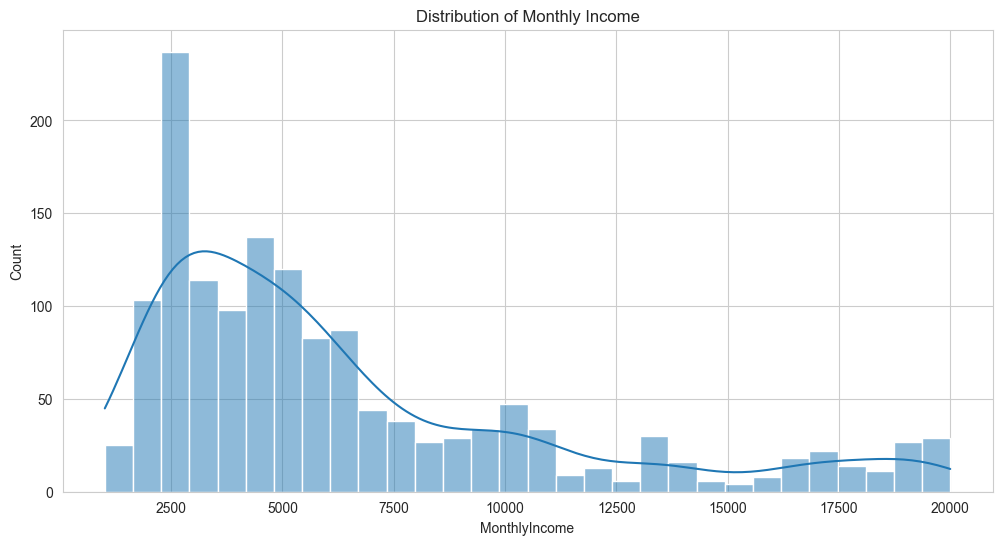

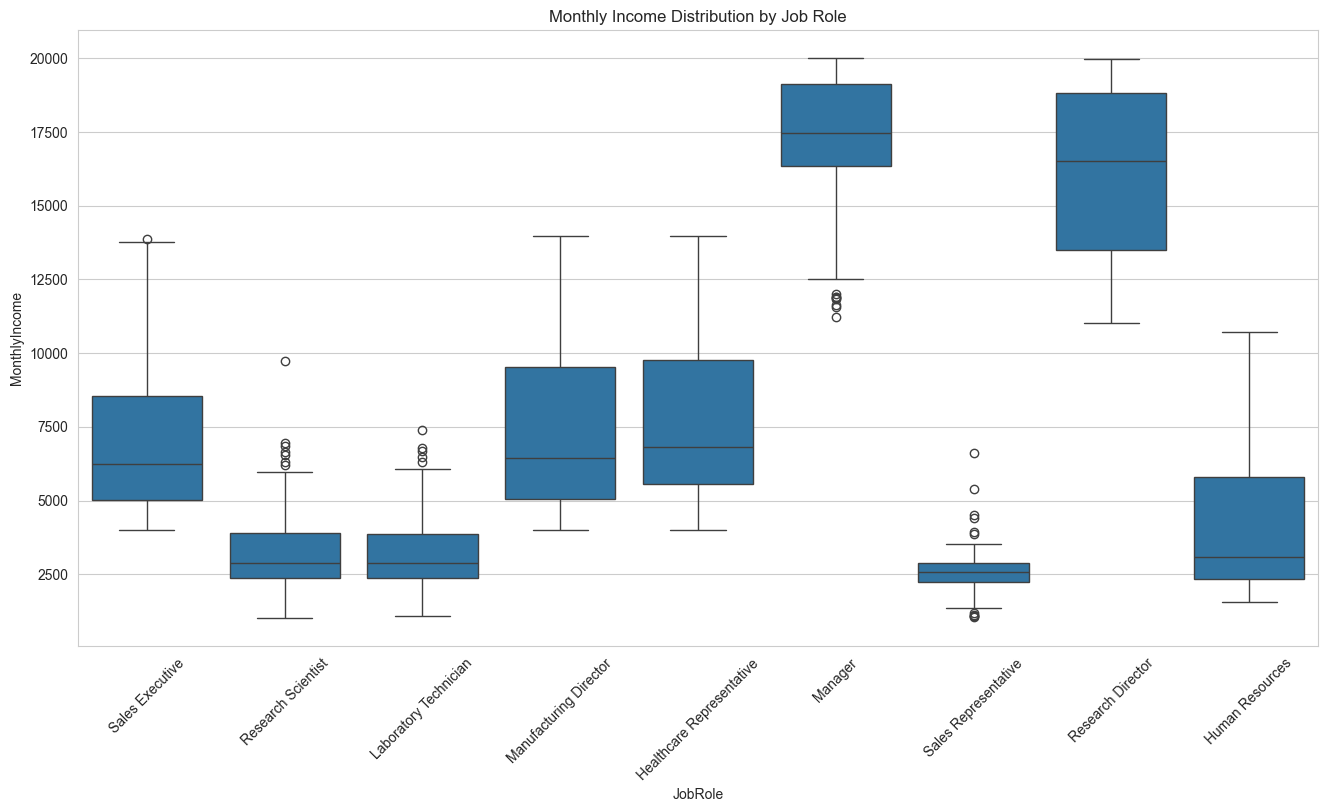

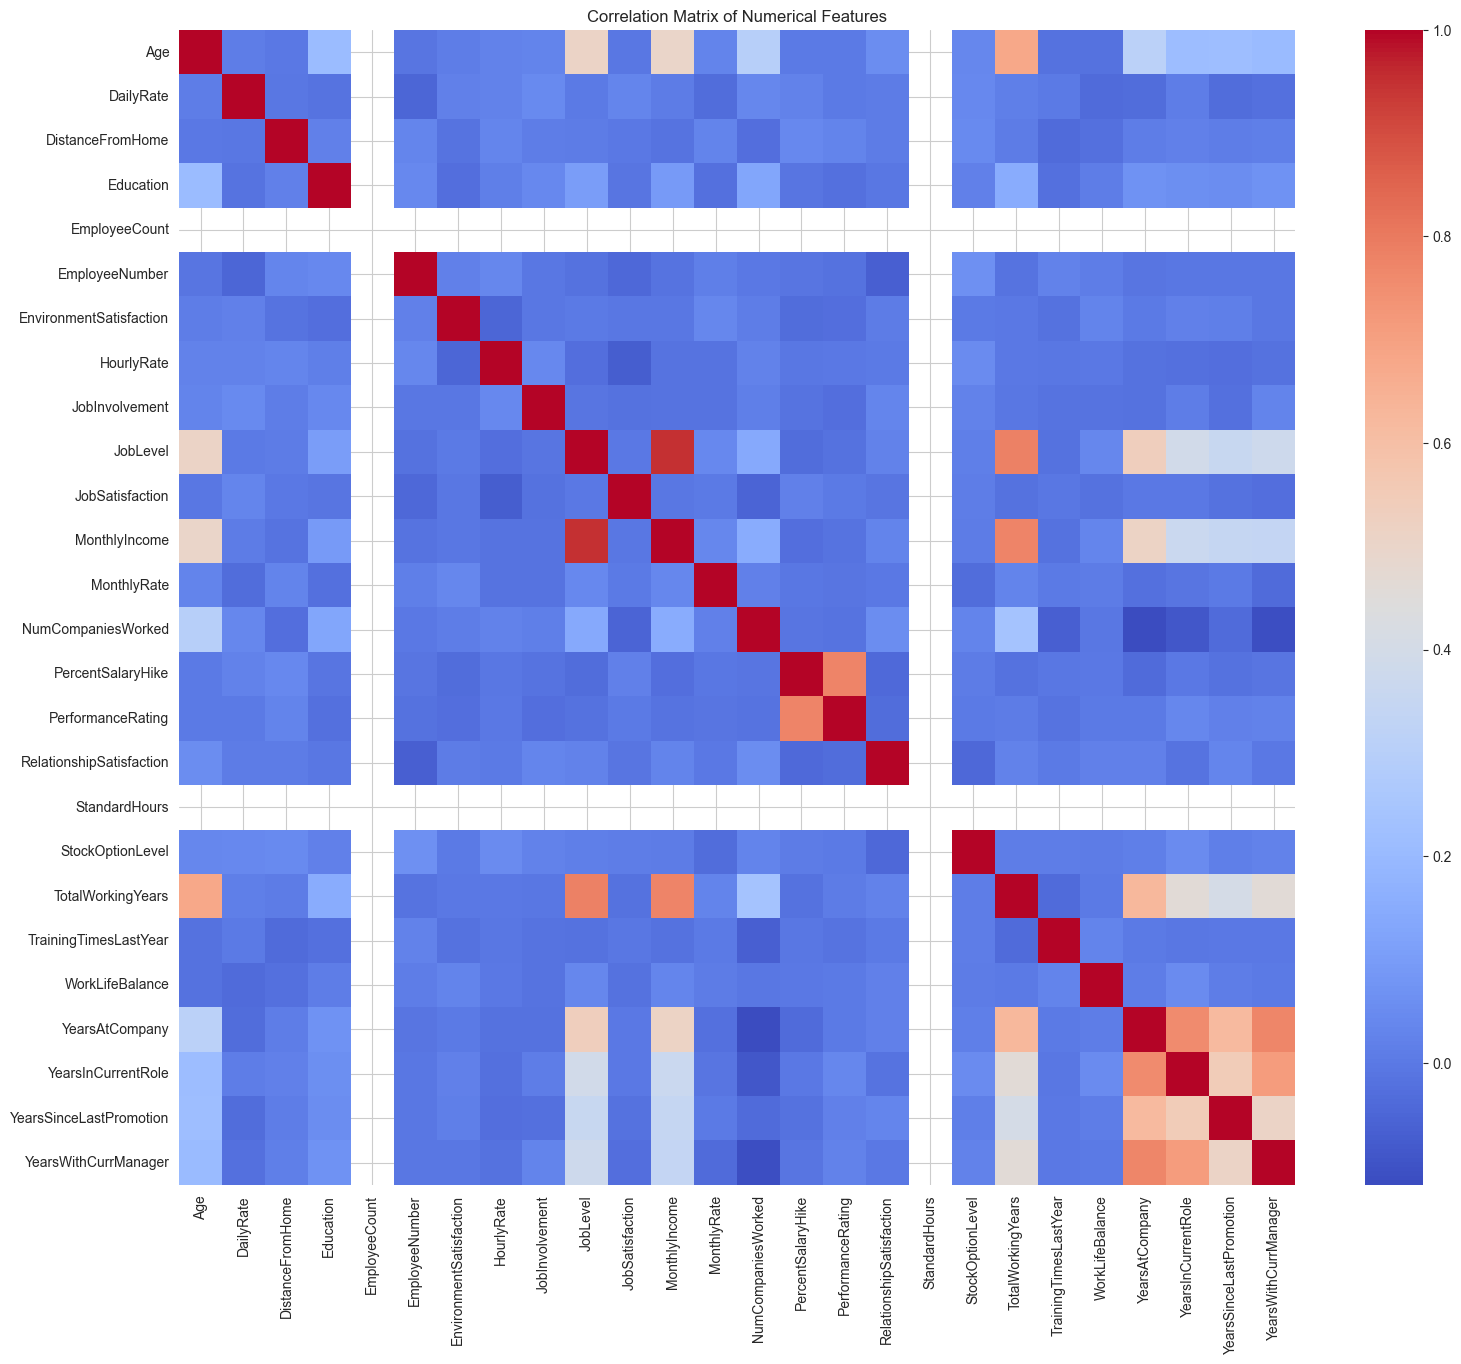

In [3]:
# Distribution of the target variable (MonthlyIncome)
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyIncome'], kde=True, bins=30)
plt.title('Distribution of Monthly Income')
plt.show()

# Boxplot of Income by Job Role
plt.figure(figsize=(16, 8))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Job Role')
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(18, 15))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [4]:
# --- Feature Selection ---
# Drop columns that are identifiers or have no predictive power
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'MonthlyRate', 'DailyRate']
df_processed = df.drop(columns=cols_to_drop)

# Define features (X) and target (y)
X = df_processed.drop('MonthlyIncome', axis=1)
y = df_processed['MonthlyIncome']

# --- Handle Categorical Data ---
# Automatically find all categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"\nShape of X after encoding: {X.shape}")

Categorical columns to encode: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Shape of X after encoding: (1470, 42)


In [5]:
# --- Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Multiple Regression Models ---
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# 1. Standard Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 2. Lasso Regression (L1 Regularization)
# Can shrink some coefficients to zero, performing feature selection.
lasso_model = Lasso(alpha=1.0, random_state=42) # alpha is the regularization strength
lasso_model.fit(X_train_scaled, y_train)

# 3. Ridge Regression (L2 Regularization)
# Shrinks coefficients but rarely makes them exactly zero. Good for multicollinearity.
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# 4. Elastic Net (Combination of L1 and L2)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42) # l1_ratio controls the mix
elastic_model.fit(X_train_scaled, y_train)

print("\nAll models trained successfully!")

Training set size: 1176 rows
Testing set size: 294 rows

All models trained successfully!


In [6]:
# --- Make Predictions with all models ---
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_elastic = elastic_model.predict(X_test_scaled)

# --- Function to calculate metrics ---
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {
        "Model": model_name,
        "MAE": f"${mae:,.2f}",
        "RMSE": f"${rmse:,.2f}",
        "R²": f"{r2:.4f}"
    }

# --- Evaluate all models and store results ---
results = []
results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))
results.append(evaluate_model(y_test, y_pred_lasso, "Lasso Regression"))
results.append(evaluate_model(y_test, y_pred_ridge, "Ridge Regression"))
results.append(evaluate_model(y_test, y_pred_elastic, "Elastic Net"))

# --- Create a comparison DataFrame ---
results_df = pd.DataFrame(results)
print("--- Model Performance Comparison ---")
display(results_df)

# --- Find the best model based on R² score ---
best_model_result = results_df.loc[results_df['R²'].astype(float).idxmax()]
best_model_name = best_model_result['Model']

print(f"\n🏆 The best performing model is: **{best_model_name}**")

# --- Save the best model, scaler, and columns ---
print("\n--- Saving Best Model Artifacts ---")

if best_model_name == "Linear Regression":
    best_model = lr_model
elif best_model_name == "Lasso Regression":
    best_model = lasso_model
elif best_model_name == "Ridge Regression":
    best_model = ridge_model
else: # Elastic Net
    best_model = elastic_model

# Save the best performing model
joblib.dump(best_model, 'salary_prediction_model.joblib')

# Save the fitted scaler (this is the same for all models)
joblib.dump(scaler, 'scaler.joblib')

# Save the list of columns the model was trained on
joblib.dump(X.columns.tolist(), 'model_columns.joblib')

print(f"Artifacts for '{best_model_name}' saved successfully!")
print("Files created: salary_prediction_model.joblib, scaler.joblib, model_columns.joblib")

--- Model Performance Comparison ---


,Model,MAE,RMSE,R²
0,Linear Regression,$894.86,"$1,170.37",0.9373
1,Lasso Regression,$893.69,"$1,169.41",0.9374
2,Ridge Regression,$894.45,"$1,169.56",0.9374
3,Elastic Net,"$1,191.48","$1,528.47",0.8931



🏆 The best performing model is: **Lasso Regression**

--- Saving Best Model Artifacts ---
Artifacts for 'Lasso Regression' saved successfully!
Files created: salary_prediction_model.joblib, scaler.joblib, model_columns.joblib


In [7]:
# --- SAVE ALL TRAINED MODELS ---
# This saves each model into a separate file for the Streamlit app to use.
print("\n--- Saving All Model Artifacts ---")

# Save each model with a distinct name
joblib.dump(lr_model, 'linear_model.joblib')
joblib.dump(lasso_model, 'lasso_model.joblib')
joblib.dump(ridge_model, 'ridge_model.joblib')
joblib.dump(elastic_model, 'elastic_model.joblib')

# Save the fitted scaler (this is the same for all models)
joblib.dump(scaler, 'scaler.joblib')

# Save the list of columns the models were trained on
joblib.dump(X.columns.tolist(), 'model_columns.joblib')

print("All models and artifacts saved successfully!")
print("Files created: linear_model.joblib, lasso_model.joblib, ridge_model.joblib, elastic_model.joblib, scaler.joblib, model_columns.joblib")


--- Saving All Model Artifacts ---
All models and artifacts saved successfully!
Files created: linear_model.joblib, lasso_model.joblib, ridge_model.joblib, elastic_model.joblib, scaler.joblib, model_columns.joblib
